In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Câu 1: Load dữ liệu

In [2]:
import pandas as pd

file = "/content/drive/MyDrive/KPDL/TH2/input/Full_Mark_2020.csv"

df = pd.read_csv(file)

df.columns = ['No', 'Code', 'Diali', 'GDCD', 'Hoahoc', 'KHTN', 'KHXH', 'LichSu', 'Ngoaingu', 'Nguvan', 'Sinhhoc', 'Toan', 'Vatli', 'city']

df.info()

<ipython-input-2-25a9a93b4b82>:5: DtypeWarning: Columns (1,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051860 entries, 0 to 1051859
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   No        1051860 non-null  int64  
 1   Code      1051860 non-null  object 
 2   Diali     677017 non-null   float64
 3   GDCD      583615 non-null   float64
 4   Hoahoc    351098 non-null   float64
 5   KHTN      340016 non-null   float64
 6   KHXH      583173 non-null   float64
 7   LichSu    692753 non-null   float64
 8   Ngoaingu  927333 non-null   float64
 9   Nguvan    1034987 non-null  float64
 10  Sinhhoc   344830 non-null   float64
 11  Toan      1047277 non-null  float64
 12  Vatli     348615 non-null   object 
 13  city      1051860 non-null  object 
dtypes: float64(10), int64(1), object(3)
memory usage: 112.4+ MB


In [3]:
df["Vatli"] = pd.to_numeric(df['Vatli'],errors='coerce')
df["city"] = pd.to_numeric(df['city'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051860 entries, 0 to 1051859
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   No        1051860 non-null  int64  
 1   Code      1051860 non-null  object 
 2   Diali     677017 non-null   float64
 3   GDCD      583615 non-null   float64
 4   Hoahoc    351098 non-null   float64
 5   KHTN      340016 non-null   float64
 6   KHXH      583173 non-null   float64
 7   LichSu    692753 non-null   float64
 8   Ngoaingu  927333 non-null   float64
 9   Nguvan    1034987 non-null  float64
 10  Sinhhoc   344830 non-null   float64
 11  Toan      1047277 non-null  float64
 12  Vatli     348613 non-null   float64
 13  city      1051854 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 112.4+ MB


In [4]:
# Kiểm tra dữ liệu trùng lặp
duplicate_rows = df[df.duplicated(subset="Code")]
print('Số dòng dữ liệu trùng lặp:', len(duplicate_rows))
# df.drop_duplicates(inplace=True) # Xóa dữ liệu trùng lặp

Số dòng dữ liệu trùng lặp: 80822


In [5]:
df = df.drop_duplicates(subset="Code")
df

,No,Code,Diali,GDCD,Hoahoc,KHTN,KHXH,LichSu,Ngoaingu,Nguvan,Sinhhoc,Toan,Vatli,city
0,0,44000001,NaN,NaN,8.00,7.08,NaN,NaN,4.4,7.50,5.50,8.4,7.75,44.0
1,1,44000002,NaN,NaN,8.25,7.17,NaN,NaN,NaN,6.00,6.25,7.6,7.00,44.0
2,2,44000003,NaN,NaN,4.50,4.92,NaN,NaN,4.0,5.00,5.75,7.0,4.50,44.0
3,3,44000004,7.50,9.25,NaN,NaN,8.67,9.25,7.4,6.75,NaN,7.2,NaN,44.0
4,4,44000005,8.00,9.00,NaN,NaN,8.50,8.50,9.2,7.00,NaN,7.6,NaN,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051855,1051855,13007414,5.25,4.25,NaN,NaN,4.08,2.75,2.8,4.00,NaN,3.6,NaN,13.0
1051856,1051856,13007415,5.25,6.25,NaN,NaN,5.83,6.00,3.8,5.50,NaN,4.6,NaN,13.0
1051857,1051857,13007416,5.75,8.50,NaN,NaN,6.67,5.75,3.4,5.00,NaN,5.4,NaN,13.0
1051858,1051858,13007417,7.25,6.75,NaN,NaN,6.25,4.75,2.2,4.50,NaN,5.2,NaN,13.0


# Câu 2: Tính trung bình, trung vị, độ lệch chuẩn môn Toán của cả nước

In [6]:
import numpy as np

# Điểm thi môn toán của các thí sinh
df_math = df[["Code", "Toan"]]

# Xóa những thí sinh không thi môn Toán
df_math = df_math.dropna(subset=['Toan'])

# df_math.to_csv("data.csv")
df_math

,Code,Toan
0,44000001,8.4
1,44000002,7.6
2,44000003,7.0
3,44000004,7.2
4,44000005,7.6
...,...,...
1051855,13007414,3.6
1051856,13007415,4.6
1051857,13007416,5.4
1051858,13007417,5.2


In [7]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966770 entries, 0 to 1051859
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Code    966770 non-null  object 
 1   Toan    966770 non-null  float64
dtypes: float64(1), object(1)
memory usage: 22.1+ MB


In [8]:
# Chuyển đổi danh sách điểm thành kiểu số
df_math = pd.to_numeric(df_math["Toan"], errors='coerce') # chuyển đổi ô không phải số về NaN

# Tạo DataFrame từ danh sách điểm
df_thongke = pd.DataFrame({'Diem': df_math})

# Thống kê tần suất xuất hiện
frequency_table = df_thongke['Diem'].value_counts().sort_index().reset_index()
frequency_table.columns = ['Giá trị điểm', 'Tần suất xuất hiện']

# Hiển thị bảng thống kê
print(frequency_table)

    Giá trị điểm  Tần suất xuất hiện
0            0.0                   7
1            0.2                   1
2            0.4                   3
3            0.6                   9
4            0.8                  51
5            1.0                 157
6            1.2                 343
7            1.4                 759
8            1.6                1400
9            1.8                2498
10           2.0                3527
11           2.2                5069
12           2.4                6486
13           2.6                7777
14           2.8                8826
15           3.0                9654
16           3.2               10502
17           3.4               10879
18           3.6               12026
19           3.8               12813
20           4.0               13882
21           4.2               14794
22           4.4               16175
23           4.6               17380
24           4.8               18782
25           5.0               20351
2

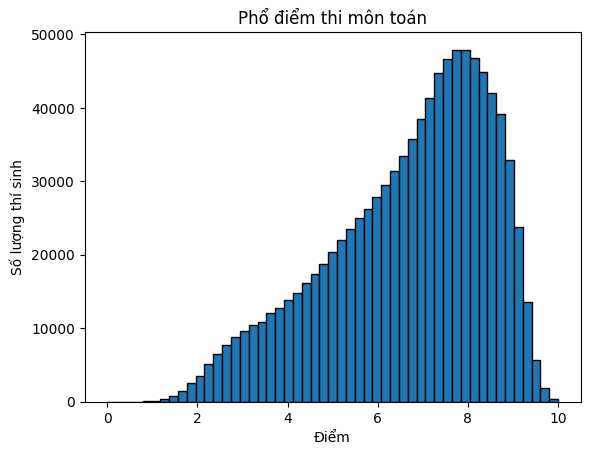

In [9]:
import matplotlib.pyplot as plt
# Khoảng điểm
bins = 51

# Vẽ histogram
plt.hist(df_math, bins=bins, edgecolor='black')
plt.xlabel('Điểm')
plt.ylabel('Số lượng thí sinh')
plt.title('Phổ điểm thi môn toán')
plt.show()

# Kết quả mô tả của df_math.describe() cho cột "Toan" là như sau:
  - count: Số lượng thí sinh trong mẫu dữ liệu. Trong trường hợp này, có 1.047.277 thí sinh.
  - mean: Điểm trung bình của môn Toán. Trung bình các điểm của tất cả thí sinh là 6.72.
  - std: Độ lệch chuẩn của môn Toán. Giá trị này là 1.82, đại diện cho mức độ phân tán của các điểm thi so với giá trị trung bình.
  - min: Điểm thấp nhất trong môn Toán. Trong trường hợp này, điểm thấp nhất là 0.00.
  - 25%: Phân vị thứ 25, còn được gọi là phân vị thứ nhất trong số ba phân vị. 25% thí sinh có điểm toán thấp hơn hoặc bằng 5.60.
  - 50%: Phân vị thứ 50, tương đương với điểm trung vị. Trong trường hợp này, 50% thí sinh có điểm toán thấp hơn hoặc bằng 7.00.
  - 75%: Phân vị thứ 75, còn được gọi là phân vị thứ ba trong số ba phân vị. 75% thí sinh có điểm toán thấp hơn hoặc bằng 8.20.
  - max: Điểm cao nhất trong môn Toán. Trong trường hợp này, điểm cao nhất là 10.00.
Các giá trị này cung cấp thông tin tổng quan về phân phối và phân tán của điểm thi môn Toán của các thí sinh.

In [10]:
df_math.describe().round(3)

count    966770.000
mean          6.705
std           1.823
min           0.000
25%           5.600
50%           7.000
75%           8.200
max          10.000
Name: Toan, dtype: float64

In [11]:
# Tính điểm trung bình, điểm trung vị, mode và độ lệch chuẩn
mean = np.mean(df_math).round(3)
median = np.median(df_math)
std = np.std(df_math).round(3)
mode = df_math.mode()

print("Điểm trung bình:", mean)
print("Điểm trung vị:", median)
print("Độ lệch chuẩn:", std)
print("Điểm xuất hiện nhiều nhất:", mode)

Điểm trung bình: 6.705
Điểm trung vị: 7.0
Độ lệch chuẩn: 1.823
Điểm xuất hiện nhiều nhất: 0    8.0
Name: Toan, dtype: float64


# Câu 3: Phân tích dữ liệu điểm thi của Tp.HCM và Hà Nội

In [12]:
# Lọc dữ liệu điểm thi của thí sinh tại Hà Nội
df_hanoi = df[df["city"] == 1]


In [13]:
df_hanoi.describe().round(3)

,No,Diali,GDCD,Hoahoc,KHTN,KHXH,LichSu,Ngoaingu,Nguvan,Sinhhoc,Toan,Vatli,city
count,78862.000,52622.000,44334.000,24252.000,23633.000,44307.000,53798.000,68000.000,77750.000,23829.000,78643.000,24255.000,78862.0
mean,312292.500,6.745,8.026,6.500,6.154,6.743,5.221,5.181,6.789,5.091,7.012,6.880,1.0
std,22765.643,1.122,0.994,1.891,1.106,0.994,1.560,2.195,1.320,1.419,1.883,1.677,0.0
min,272862.000,0.000,0.000,0.000,1.080,0.670,0.000,0.000,0.000,0.000,0.800,0.000,1.0
25%,292577.250,6.000,7.500,5.000,5.420,6.080,4.000,3.200,6.000,4.000,5.800,6.000,1.0
50%,312292.500,6.750,8.250,7.000,6.250,6.750,5.000,4.800,7.000,5.000,7.600,7.250,1.0
75%,332007.750,7.500,8.750,8.000,7.000,7.420,6.250,7.000,7.750,6.000,8.400,8.250,1.0
max,351723.000,10.000,10.000,10.000,9.500,9.830,10.000,10.000,9.500,10.000,10.000,10.000,1.0


In [14]:
# Lọc dữ liệu điểm thi của thí sinh tại Tp.HCM
df_hcm = df[df["city"] == 2]
df_hcm.describe().round(3)

,No,Diali,GDCD,Hoahoc,KHTN,KHXH,LichSu,Ngoaingu,Nguvan,Sinhhoc,Toan,Vatli,city
count,74453.000,29604.000,25239.000,43144.000,41950.000,25222.000,30320.000,66166.000,72648.000,42608.000,74205.000,42855.000,74453.0
mean,576764.000,6.869,8.327,6.620,6.275,6.895,5.384,5.863,6.744,5.655,7.363,6.581,2.0
std,21492.874,1.020,0.884,1.444,1.005,0.902,1.494,1.775,0.891,1.270,1.300,1.367,0.0
min,539538.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.0
25%,558151.000,6.250,7.750,5.500,5.580,6.250,4.250,4.600,6.250,4.750,6.600,5.750,2.0
50%,576764.000,7.000,8.500,6.750,6.330,6.920,5.250,5.800,6.750,5.500,7.600,6.750,2.0
75%,595377.000,7.500,9.000,7.750,7.000,7.500,6.250,7.200,7.250,6.500,8.200,7.500,2.0
max,613990.000,10.000,10.000,10.000,9.250,9.580,10.000,10.000,9.250,10.000,10.000,9.750,2.0


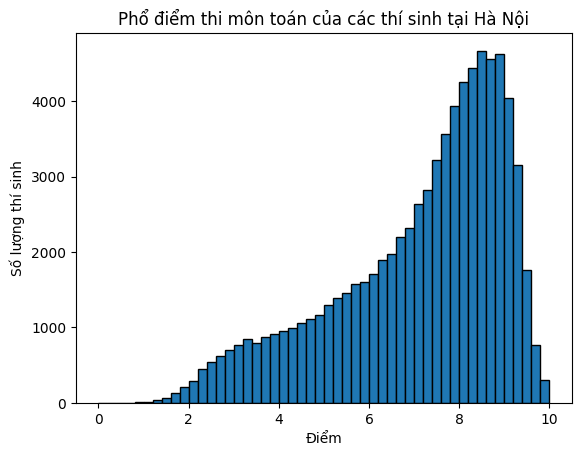

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Điểm thi môn toán của các thí sinh
df_hanoi_math = df_hanoi["Toan"]

# Loại bỏ các giá trị không hợp lệ (nếu có)
df_hanoi_math = df_hanoi_math.dropna()

# Khoảng điểm
bins = [i / 10 for i in range(0, 101, 2)]

# Vẽ histogram
plt.hist(df_hanoi_math, bins=bins, edgecolor='black')
plt.xlabel('Điểm')
plt.ylabel('Số lượng thí sinh')
plt.title('Phổ điểm thi môn toán của các thí sinh tại Hà Nội')
plt.show()

In [16]:
# Tính điểm trung bình, điểm trung vị, mode và độ lệch chuẩn
mean = np.mean(df_hanoi_math).round(3)
median = np.median(df_hanoi_math)
std = np.std(df_hanoi_math).round(3)
mode = df_hanoi_math.mode()

print("Điểm trung bình:", mean)
print("Điểm trung vị:", median)
print("Độ lệch chuẩn:", std)
print("Điểm xuất hiện nhiều nhất:", mode)

Điểm trung bình: 7.012
Điểm trung vị: 7.6
Độ lệch chuẩn: 1.883
Điểm xuất hiện nhiều nhất: 0    8.4
Name: Toan, dtype: float64


In [17]:
import pandas as pd

# Kiểm tra xem có thí sinh nào thi cả khtn và khxh không
thi_ca_hai = df_hanoi[(df_hanoi['KHTN'].notnull()) & (df_hanoi['KHXH'].notnull())]

# Kiểm tra xem kết quả
if len(thi_ca_hai) > 0:
    print("Có thí sinh thi cả khtn và khxh.")
    print(thi_ca_hai)
else:
    print("Không có thí sinh thi cả khtn và khxh.")


Không có thí sinh thi cả khtn và khxh.


In [18]:
import pandas as pd

# Kiểm tra xem có thí sinh nào không thi cả khtn và khxh không
df_hanoi['KhongThiKH'] = df_hanoi[['KHTN', 'KHXH']].isna().all(axis=1)

# In kết quả
print(df_hanoi[df_hanoi['KhongThiKH'] == True])


            No      Code  Diali  GDCD  Hoahoc  KHTN  KHXH  LichSu  Ngoaingu  \
272862  272862   1000001    NaN   NaN     NaN   NaN   NaN    8.00       NaN   
272865  272865   1000004    NaN   NaN     6.0   NaN   NaN     NaN       8.2   
272867  272867   1000006    NaN   NaN     NaN   NaN   NaN     NaN       9.4   
272869  272869   1000008   6.25   NaN     NaN   NaN   NaN    3.25       NaN   
272873  272873   1000012   4.25   NaN     NaN   NaN   NaN    3.50       NaN   
...        ...       ...    ...   ...     ...   ...   ...     ...       ...   
350668  350668  01078179   6.50   NaN     NaN   NaN   NaN    4.25       NaN   
350671  350671  01078183   4.50   NaN     NaN   NaN   NaN    3.75       NaN   
350673  350673  01078185   5.75   NaN     NaN   NaN   NaN    3.50       NaN   
351426  351426  01078938    NaN   NaN     NaN   NaN   NaN     NaN       3.0   
351539  351539  01079051    NaN   NaN     NaN   NaN   NaN     NaN       NaN   

        Nguvan  Sinhhoc  Toan  Vatli  city  KhongTh

<ipython-input-18-98bdebb8e118>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hanoi['KhongThiKH'] = df_hanoi[['KHTN', 'KHXH']].isna().all(axis=1)


In [19]:
import pandas as pd

# Tính tổng điểm toán + văn + ngoại ngữ + khxh hoặc khtn của từng thí sinh
df_hanoi['TongDiem'] = df_hanoi[['Toan', 'Nguvan', 'Ngoaingu', 'KHTN', 'KHXH']].sum(axis=1)

# In kết quả
print(df_hanoi[['Toan', 'Nguvan', 'Ngoaingu', 'KHTN', 'KHXH', 'TongDiem']])


        Toan  Nguvan  Ngoaingu  KHTN  KHXH  TongDiem
272862   7.0     6.0       NaN   NaN   NaN     13.00
272863   9.0     6.0       9.4  7.75   NaN     32.15
272864   8.8     6.5       6.0  7.25   NaN     28.55
272865   7.0     NaN       8.2   NaN   NaN     15.20
272866   9.0     7.5       9.2   NaN  7.42     33.12
...      ...     ...       ...   ...   ...       ...
351719   7.0     6.0       9.0   NaN  7.08     29.08
351720   8.0     4.0       6.0  3.17   NaN     21.17
351721   5.4     7.0       3.2   NaN  6.17     21.77
351722   8.2     5.5       7.0  5.42   NaN     26.12
351723   1.8     6.5       3.2   NaN  5.75     17.25

[78862 rows x 6 columns]


<ipython-input-19-fc37e7919aeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hanoi['TongDiem'] = df_hanoi[['Toan', 'Nguvan', 'Ngoaingu', 'KHTN', 'KHXH']].sum(axis=1)


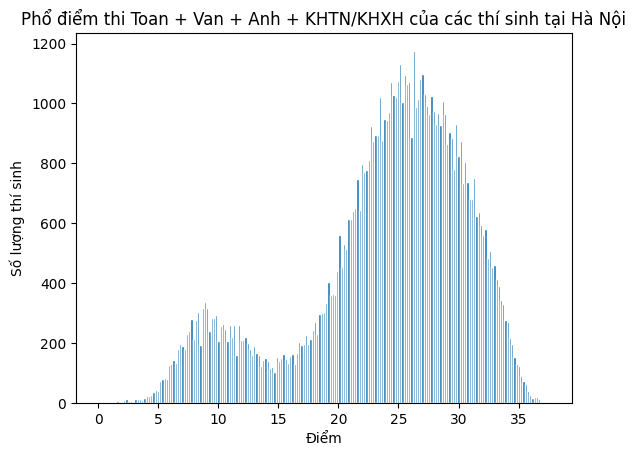

In [20]:
# Khoảng điểm
bins = 201

# Vẽ histogram
plt.hist(df_hanoi["TongDiem"], bins=bins, edgecolor='white')
plt.xlabel('Điểm')
plt.ylabel('Số lượng thí sinh')
plt.title('Phổ điểm thi Toan + Van + Anh + KHTN/KHXH của các thí sinh tại Hà Nội')
plt.show()